## Créer du bruit sur une image vide

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### En utilisant np.random.randn

In [2]:
background = np.zeros((128,128))
noise = np.random.randn(128, 128)
image = background + noise
print('Image min: {}, Image max: {}'.format(image.min(), image.max()))

Image min: -4.151547815203778, Image max: 3.6998514781161966


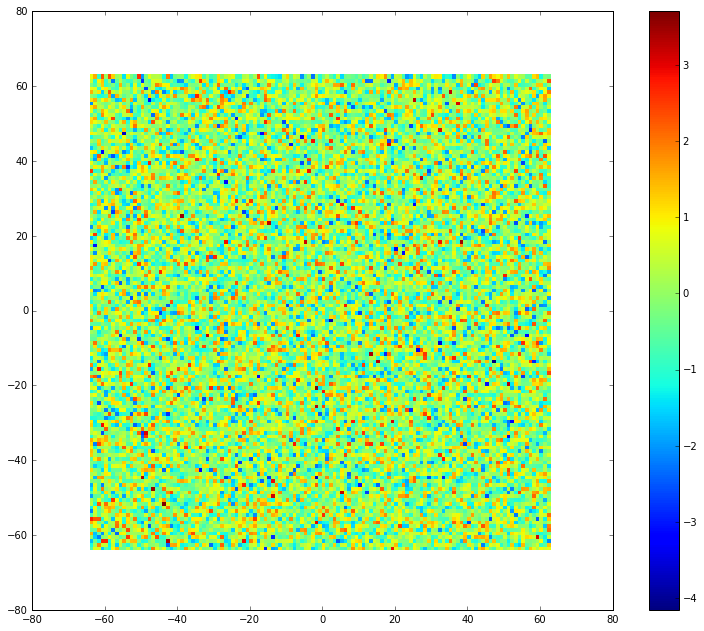

In [3]:
fig, ax = plt.subplots(figsize=(13,10.725))
cmap = ax.pcolor(np.arange(-64,64), np.arange(-64,64), image)
fig.colorbar(cmap)

### En utilisant np.random.normal

In [4]:
background = np.zeros((128,128))
noise = np.random.normal(0,1,(128, 128))
image = background + noise
print('Image min: {}, Image max: {}'.format(image.min(), image.max()))

Image min: -4.658879134150157, Image max: 3.6022064045996376


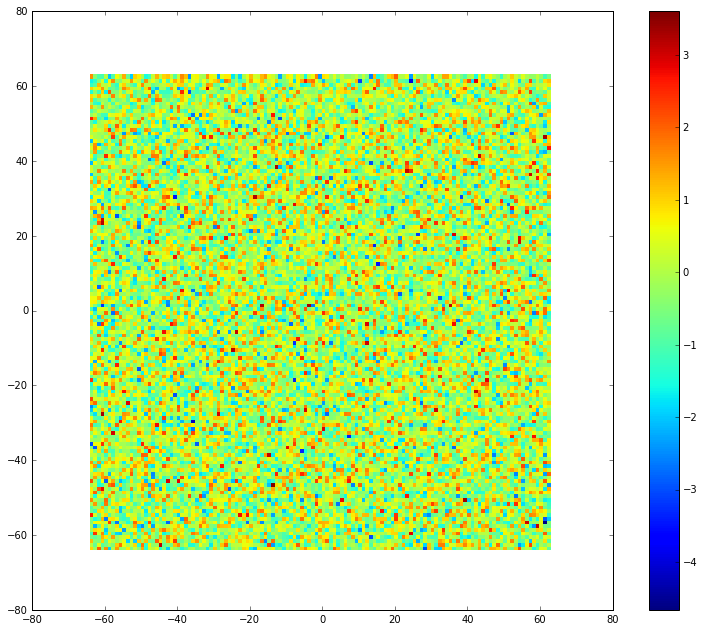

In [5]:
fig, ax = plt.subplots(figsize=(13,10.725))
cmap = ax.pcolor(np.arange(-64,64), np.arange(-64,64), image)
fig.colorbar(cmap)

### En utilisant la librairie noise (bruit perlin)

In [284]:
import noise
help(noise)

Help on package noise:

NAME
    noise - Noise functions for procedural generation of content

DESCRIPTION
    Contains native code implementations of Perlin improved noise (with
    fBm capabilities) and Perlin simplex noise. Also contains a fast
    "fake noise" implementation in GLSL for execution in shaders.
    
    Copyright (c) 2008, Casey Duncan (casey dot duncan at gmail dot com)

PACKAGE CONTENTS
    _perlin
    _simplex
    perlin
    setup
    shader
    shader_noise
    test

FUNCTIONS
    pnoise1 = noise1(...)
        noise1(x, octaves=1, persistence=0.5, lacunarity=2.0, repeat=1024, base=0.0)
        
        1 dimensional perlin improved noise function (see noise3 for more info)
    
    pnoise2 = noise2(...)
        noise2(x, y, octaves=1, persistence=0.5, lacunarity=2.0, repeatx=1024, repeaty=1024, base=0.0)
        
        2 dimensional perlin improved noise function (see noise3 for more info)
    
    pnoise3 = noise3(...)
        noise3(x, y, z, octaves=1, persist

(128, 128)


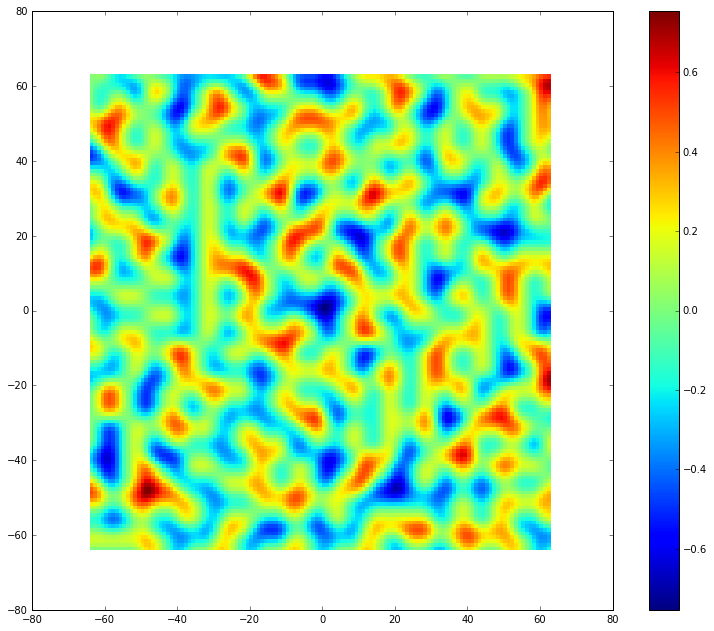

In [285]:
shape = (128,128)
scale = 10                                 #default: 100
octaves = int(6 * abs(np.random.randn()))  #number of passes for generating fBm noise
if octaves == 0: octaves += 1              #octave minimum value is 1
persistence = 0.5 * abs(np.random.randn()) #amplitude of each successive octave relative to the one below it
lacunarity = 2.0 * abs(np.random.randn())  #frequency of each successive octave relative to the one below it

world = np.zeros(shape)
for i in range(shape[0]):
    for j in range(shape[1]):
        world[i][j] = noise.pnoise2(i/scale,
                                    j/scale,
                                    octaves=octaves,
                                    persistence=persistence,
                                    lacunarity=lacunarity,
                                    repeatx=shape[0], #interval along x-axis when the noise values repeat
                                    repeaty=shape[1], #interval along x-axis when the noise values repeat
                                    base=0)           #fixed offset for the input coordinates (useful for generating different noise textures with the same repeat interval)

print(world.shape)
fig, ax = plt.subplots(figsize=(13,10.725))
cmap = ax.pcolor(np.arange(-64,64), np.arange(-64,64), world)
fig.colorbar(cmap)

#### Transformer la génération de bruit en fonction

In [286]:
def randomized_perlin_noise(shape=(128,128), scale=10, octaves=6, persistence=0.5, lacunarity=2.0, base=0):
    noise_vector = np.zeros(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            noise_vector[i][j] = noise.pnoise2(i/scale,
                                        j/scale,
                                        octaves=int(octave * abs(np.random.randn()))+1,
                                        persistence=persistence * abs(np.random.randn()),
                                        lacunarity=lacunarity * abs(np.random.randn()),
                                        repeatx=shape[0], 
                                        repeaty=shape[1], 
                                        base=base)           

    return noise_vector